# Data Dictionary

# [Link to dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance)

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-za14{border-color:inherit;text-align:left;vertical-align:bottom}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-za14">Column Name</th>
    <th class="tg-7zrl">Description</th>
    <th class="tg-7zrl">Data Type</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">hash</td>
    <td class="tg-7zrl">Unique identifier for each record</td>
    <td class="tg-7zrl">Alphanumeric</td>
  </tr>
  <tr>
    <td class="tg-7zrl">t_0 - t_99</td>
    <td class="tg-7zrl">Time series measurement at index 0-99</td>
    <td class="tg-7zrl">Numerical (Float)</td>
  </tr>
  <tr>
    <td class="tg-7zrl">malware</td>
    <td class="tg-7zrl">Goodware (0) and Malware (1)</td>
    <td class="tg-7zrl">Categorical (Class)</td>
  </tr>
</tbody>
</table>

# Import necessary libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/malware-analysis-datasets-api-call-sequences/dynamic_api_call_sequence_per_malware_100_0_306.csv


In [2]:
# --- Installation (Run these only if needed in your environment) ---
# You generally only need ONE of these commands. Choose based on your needs:
!pip install imblearn             # Installs the latest version of imblearn
!pip install imbalanced-learn==0.10.1 # Installs a specific version
!pip install --upgrade imbalanced-learn # Upgrades to the latest version

# --- Core Libraries ---
import numpy as np             # Numerical operations
import pandas as pd            # Data manipulation and analysis
import matplotlib.pyplot as plt # Plotting library
import seaborn as sns          # Enhanced statistical data visualization
# import pylab as pl             # Less common; plt usually suffices for direct plotting

# --- Scikit-learn (Machine Learning) ---
from sklearn.utils import shuffle # Utility for shuffling arrays
from sklearn.model_selection import (
    train_test_split,    # For splitting data into training and test sets
    cross_val_score,     # For cross-validation evaluation
    GridSearchCV         # For hyperparameter tuning
)
from sklearn.preprocessing import StandardScaler # For standardizing features
from sklearn.decomposition import PCA # For Principal Component Analysis (dimensionality reduction)
from sklearn.datasets import make_classification # Used for generating dummy data if not provided

# --- Scikit-learn: Metrics ---
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    precision_recall_curve,
    auc,
    roc_curve
)

# --- Imbalanced-learn (for handling imbalanced datasets) ---
import imblearn                  # General import for the library
from imblearn.over_sampling import SMOTE # For Synthetic Minority Over-sampling Technique

# --- PyTorch ---
import torch
import torch.nn as nn
import torch.optim as optim

# --- Other Utilities ---
import os # For interacting with the operating system (e.g., file paths)

# --- Matplotlib Magic Command (for Jupyter/IPython notebooks) ---
# %matplotlib inline # Ensures plots are displayed inline in the notebook

# --- Version Check (This is execution code, not an import) ---
print(f"PyTorch Version: {torch.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 78.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 7.3 MB/s eta 0:00:00
  Attempti

# Load Dataset

In [3]:
# reading data
df = pd.read_csv('/kaggle/input/malware-analysis-datasets-api-call-sequences/dynamic_api_call_sequence_per_malware_100_0_306.csv')
df.head()

hash  t_0  t_1  t_2  t_3  t_4  t_5  t_6  t_7  \
0  071e8c3f8922e186e57548cd4c703a5d  112  274  158  215  274  158  215  298   
1  33f8e6d08a6aae939f25a8e0d63dd523   82  208  187  208  172  117  172  117   
2  b68abd064e975e1c6d5f25e748663076   16  110  240  117  240  117  240  117   
3  72049be7bd30ea61297ea624ae198067   82  208  187  208  172  117  172  117   
4  c9b3700a77facf29172f32df6bc77f48   82  240  117  240  117  240  117  240   

   t_8  ...  t_91  t_92  t_93  t_94  t_95  t_96  t_97  t_98  t_99  malware  
0   76  ...    71   297   135   171   215    35   208    56    71        1  
1  172  ...    81   240   117    71   297   135   171   215    35        1  
2  240  ...    65   112   123    65   112   123    65   113   112        1  
3  172  ...   208   302   208   302   187   208   302   228   302        1  
4  117  ...   209   260    40   209   260   141   260   141   260        1  

[5 rows x 102 columns]

In [4]:
df = df.drop(columns=['hash'],axis=1)
df = df.dropna(how='any')
df

t_0  t_1  t_2  t_3  t_4  t_5  t_6  t_7  t_8  t_9  ...  t_91  t_92  \
0      112  274  158  215  274  158  215  298   76  208  ...    71   297   
1       82  208  187  208  172  117  172  117  172  117  ...    81   240   
2       16  110  240  117  240  117  240  117  240  117  ...    65   112   
3       82  208  187  208  172  117  172  117  172  117  ...   208   302   
4       82  240  117  240  117  240  117  240  117  172  ...   209   260   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
43871   82  240  117  240  117  240  117  240  117  172  ...   141   260   
43872   82  240  117  240  117  240  117  240  117  172  ...   159   224   
43873   82  240  117  240  117  240  117  240  117  172  ...   260   141   
43874   82  240  117  240  117  240  117  240  117  172  ...   141   260   
43875  112  274  158  215  274  158  215  298   76  208  ...    71   297   

       t_93  t_94  t_95  t_96  t_97  t_98  t_99  malware  
0       135   171   215    35   208    56    71        1  
1       117    71   297   135   171   215    35        1  
2       123    65   112   123    65   113   112        1  
3       208   302   187   208   302   228   302        1  
4        40   209   260   141   260   141   260        1  
...     ...   ...   ...   ...   ...   ...   ...      ...  
43871   141   260   141   260   141   260   141        1  
43872    82   159   224    82   159   224    82        1  
43873   260   141   260   141   260   141   260        1  
43874   141   260   141   260   141   260   141        1  
43875   135   171   215    35   208    56    71        1  

[43876 rows x 101 columns]

# Split Dataset

In [5]:
# Split the data into training and testing sets
train, test = train_test_split(df, test_size=0.2, random_state=42) 

# Print the shapes of the resulting sets
print("train shape:", train.shape)
print("test shape:", test.shape)

train shape: (35100, 101)
test shape: (8776, 101)


# Data Visualization

## Basic Statistics

In [6]:
train.head()

t_0  t_1  t_2  t_3  t_4  t_5  t_6  t_7  t_8  t_9  ...  t_91  t_92  \
35602  112  274  158  215  274  158  215  298   76  208  ...    71   297   
13858  112  274  158  215  274  158  215  298   76  208  ...   172   117   
39770  112  274  158  215  274  158  215  298   76  208  ...    71   297   
1024   208  286   76  110  240  117  208  187  208  198  ...   286   240   
31154   82  208  187  208  172  117  172  208   16  208  ...   117   172   

       t_93  t_94  t_95  t_96  t_97  t_98  t_99  malware  
35602   135   171   215    35   208    56    71        1  
13858   172   117   172   117   172   117   172        1  
39770   135   171   215    35   208    56    71        1  
1024    286   117   208   286   240   286   117        1  
31154   117   208   172   117   100   215    35        1  

[5 rows x 101 columns]

In [7]:
train.describe()

t_0           t_1           t_2           t_3           t_4  \
count  35100.000000  35100.000000  35100.000000  35100.000000  35100.000000   
mean     142.787123    211.254872    148.203333    188.834245    187.417949   
std       75.600839     60.294950     47.698712     68.358486     71.255625   
min        2.000000      2.000000      2.000000      2.000000      0.000000   
25%       82.000000    172.000000    117.000000    117.000000    117.000000   
50%       82.000000    240.000000    158.000000    215.000000    172.000000   
75%      215.000000    240.000000    172.000000    240.000000    274.000000   
max      306.000000    306.000000    306.000000    306.000000    306.000000   

                t_5           t_6           t_7           t_8           t_9  \
count  35100.000000  35100.000000  35100.000000  35100.000000  35100.000000   
mean     174.108063    170.378148    199.045271    142.807322    167.325413   
std       65.739453     55.525942     65.516243     66.800136     53.441632   
min        0.000000      0.000000      2.000000      0.000000      2.000000   
25%      117.000000    117.000000    159.000000    117.000000    117.000000   
50%      158.000000    172.000000    215.000000    117.000000    172.000000   
75%      240.000000    215.000000    240.000000    208.000000    208.000000   
max      306.000000    306.000000    306.000000    306.000000    306.000000   

       ...          t_91          t_92          t_93          t_94  \
count  ...  35100.000000  35100.000000  35100.000000  35100.000000   
mean   ...    154.204786    173.156809    159.560484    164.906980   
std    ...     78.291792     82.742852     74.071577     70.322547   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...     81.000000    117.000000    114.000000    117.000000   
50%    ...    141.000000    172.000000    141.000000    171.000000   
75%    ...    240.000000    260.000000    240.000000    215.000000   
max    ...    306.000000    306.000000    306.000000    306.000000   

               t_95          t_96          t_97          t_98          t_99  \
count  35100.000000  35100.000000  35100.000000  35100.000000  35100.000000   
mean     173.463419    152.373533    158.394758    160.395926    155.748262   
std       70.531624     79.906061     78.029384     75.022546     78.949398   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      117.000000     89.000000    100.000000    108.000000     73.000000   
50%      172.000000    141.000000    171.000000    156.000000    141.000000   
75%      240.000000    215.000000    224.000000    225.000000    225.000000   
max      306.000000    306.000000    306.000000    306.000000    306.000000   

            malware  
count  35100.000000  
mean       0.975698  
std        0.153987  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  

[8 rows x 101 columns]

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35100 entries, 35602 to 15795
Columns: 101 entries, t_0 to malware
dtypes: int64(101)
memory usage: 27.3 MB


In [9]:
train.isnull().sum()

t_0        0
t_1        0
t_2        0
t_3        0
t_4        0
          ..
t_96       0
t_97       0
t_98       0
t_99       0
malware    0
Length: 101, dtype: int64

In [10]:
test.isnull().sum()

t_0        0
t_1        0
t_2        0
t_3        0
t_4        0
          ..
t_96       0
t_97       0
t_98       0
t_99       0
malware    0
Length: 101, dtype: int64

## Distribution of target label

In [11]:
train['malware'].value_counts(normalize=True)*100

malware
1    97.569801
0     2.430199
Name: proportion, dtype: float64

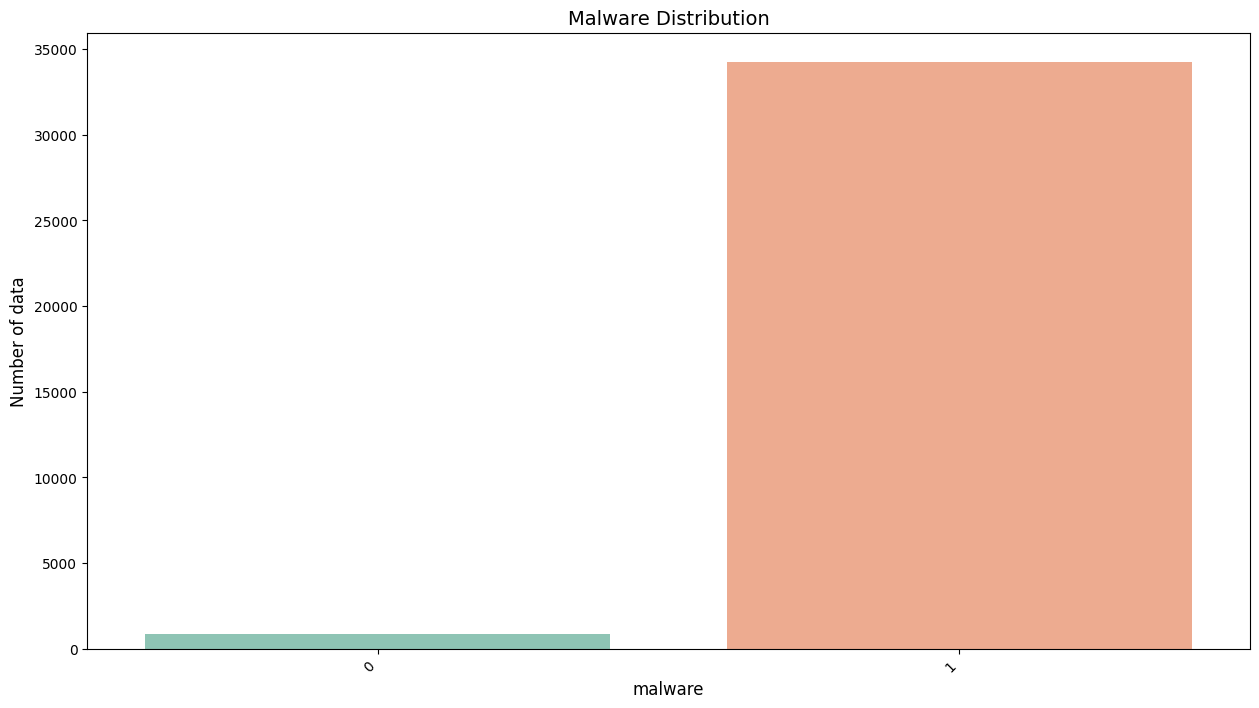

In [12]:
cnt_pro = train['malware'].value_counts()

plt.figure(figsize=(15,8))
# Assign the barplot to an axes object 'ax'
ax = sns.barplot(x=cnt_pro.index, y=cnt_pro.values, alpha=0.8, palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.ylabel('Number of data', fontsize=12)
plt.xlabel('malware', fontsize=12)
# Remove the duplicate plt.xticks(rotation=90) as ax.set_xticklabels handles rotation
# plt.xticks(rotation=90)
plt.title('Malware Distribution', fontsize=14)
plt.show()

# Feature Engineer

## Split into features and target label

In [13]:
x_train = train.drop('malware', axis=1) 
y_train = train['malware'] 
x_test = test.drop('malware', axis=1) 
y_test = test['malware'] 

# Print the shapes of the resulting sets
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (35100, 100)
y_train shape: (35100,)
X_test shape: (8776, 100)
y_test shape: (8776,)


## Data Normalization

In [14]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
x_train_std = scaler.fit_transform(x_train)
# Transform the test data using the fitted scaler
x_test_std = scaler.transform(x_test)

In [15]:
# Convert the scaled data back to DataFrames
x_train_std = pd.DataFrame(x_train_std, columns=x_train.columns)
x_test_std = pd.DataFrame(x_test_std, columns=x_test.columns)
x_train_std.describe()

t_0           t_1           t_2           t_3           t_4  \
count  3.510000e+04  3.510000e+04  3.510000e+04  3.510000e+04  3.510000e+04   
mean  -1.530400e-16 -1.220676e-16 -2.702492e-16 -1.805710e-16 -1.781418e-17   
std    1.000014e+00  1.000014e+00  1.000014e+00  1.000014e+00  1.000014e+00   
min   -1.862269e+00 -3.470570e+00 -3.065186e+00 -2.733193e+00 -2.630257e+00   
25%   -8.040650e-01 -6.510567e-01 -6.541849e-01 -1.050861e+00 -9.882581e-01   
50%   -8.040650e-01  4.767487e-01  2.053893e-01  3.827780e-01 -2.163783e-01   
75%    9.551998e-01  4.767487e-01  4.989025e-01  7.485023e-01  1.215108e+00   
max    2.158907e+00  1.571383e+00  3.308243e+00  1.714014e+00  1.664202e+00   

                t_5           t_6           t_7           t_8           t_9  \
count  3.510000e+04  3.510000e+04  3.510000e+04  3.510000e+04  3.510000e+04   
mean  -6.498126e-17  7.530538e-17  8.502221e-18 -1.064802e-16  2.206529e-17   
std    1.000014e+00  1.000014e+00  1.000014e+00  1.000014e+00  1.000014e+00   
min   -2.648494e+00 -3.068486e+00 -3.007622e+00 -2.137860e+00 -3.093614e+00   
25%   -8.687154e-01 -9.613328e-01 -6.112353e-01 -3.863419e-01 -9.417027e-01   
50%   -2.450323e-01  2.920932e-02  2.435267e-01 -3.863419e-01  8.747213e-02   
75%    1.002334e+00  8.036331e-01  6.251169e-01  9.759502e-01  7.611139e-01   
max    2.006311e+00  2.442530e+00  1.632515e+00  2.443034e+00  2.594916e+00   

       ...          t_90          t_91          t_92          t_93  \
count  ...  3.510000e+04  3.510000e+04  3.510000e+04  3.510000e+04   
mean   ...  3.623566e-17  1.651860e-16  2.753100e-17 -1.615422e-16   
std    ...  1.000014e+00  1.000014e+00  1.000014e+00  1.000014e+00   
min    ... -1.988217e+00 -1.969644e+00 -2.092740e+00 -2.154170e+00   
25%    ... -5.210352e-01 -9.350384e-01 -6.787004e-01 -6.150960e-01   
50%    ... -6.894509e-03 -1.686636e-01 -1.398097e-02 -2.505786e-01   
75%    ...  1.021387e+00  1.095855e+00  1.049570e+00  1.085986e+00   
max    ...  1.849028e+00  1.938867e+00  1.605517e+00  1.977028e+00   

               t_94          t_95          t_96          t_97          t_98  \
count  3.510000e+04  3.510000e+04  3.510000e+04  3.510000e+04  3.510000e+04   
mean   1.595179e-16  2.200456e-16  1.388696e-16  1.046583e-16  2.672127e-17   
std    1.000014e+00  1.000014e+00  1.000014e+00  1.000014e+00  1.000014e+00   
min   -2.345042e+00 -2.459406e+00 -1.906935e+00 -2.029966e+00 -2.138000e+00   
25%   -6.812561e-01 -8.005519e-01 -7.931117e-01 -7.483795e-01 -6.984123e-01   
50%    8.664514e-02 -2.074870e-02 -1.423383e-01  1.615471e-01 -5.859557e-02   
75%    7.123424e-01  9.433716e-01  7.837623e-01  8.407881e-01  8.611411e-01   
max    2.006398e+00  1.879135e+00  1.922616e+00  1.891689e+00  1.940832e+00   

               t_99  
count  3.510000e+04  
mean  -2.186285e-17  
std    1.000014e+00  
min   -1.972789e+00  
25%   -1.048133e+00  
50%   -1.868092e-01  
75%    8.771786e-01  
max    1.903167e+00  

[8 rows x 100 columns]

## Dimensionality Reduction

In [16]:
# --- Apply PCA for dimensionality reduction ---
# 1. Initialize PCA with the desired number of components.  For example, to reduce to 2 dimensions
pca = PCA(n_components=2) # You can change n_components as needed
# 2. Fit PCA on the scaled training data and transform it.
x_train = pca.fit_transform(x_train_std)
# 3. Transform the scaled test data using the fitted PCA.
x_test = pca.transform(x_test_std)

## Visualization after dimensionality reduction

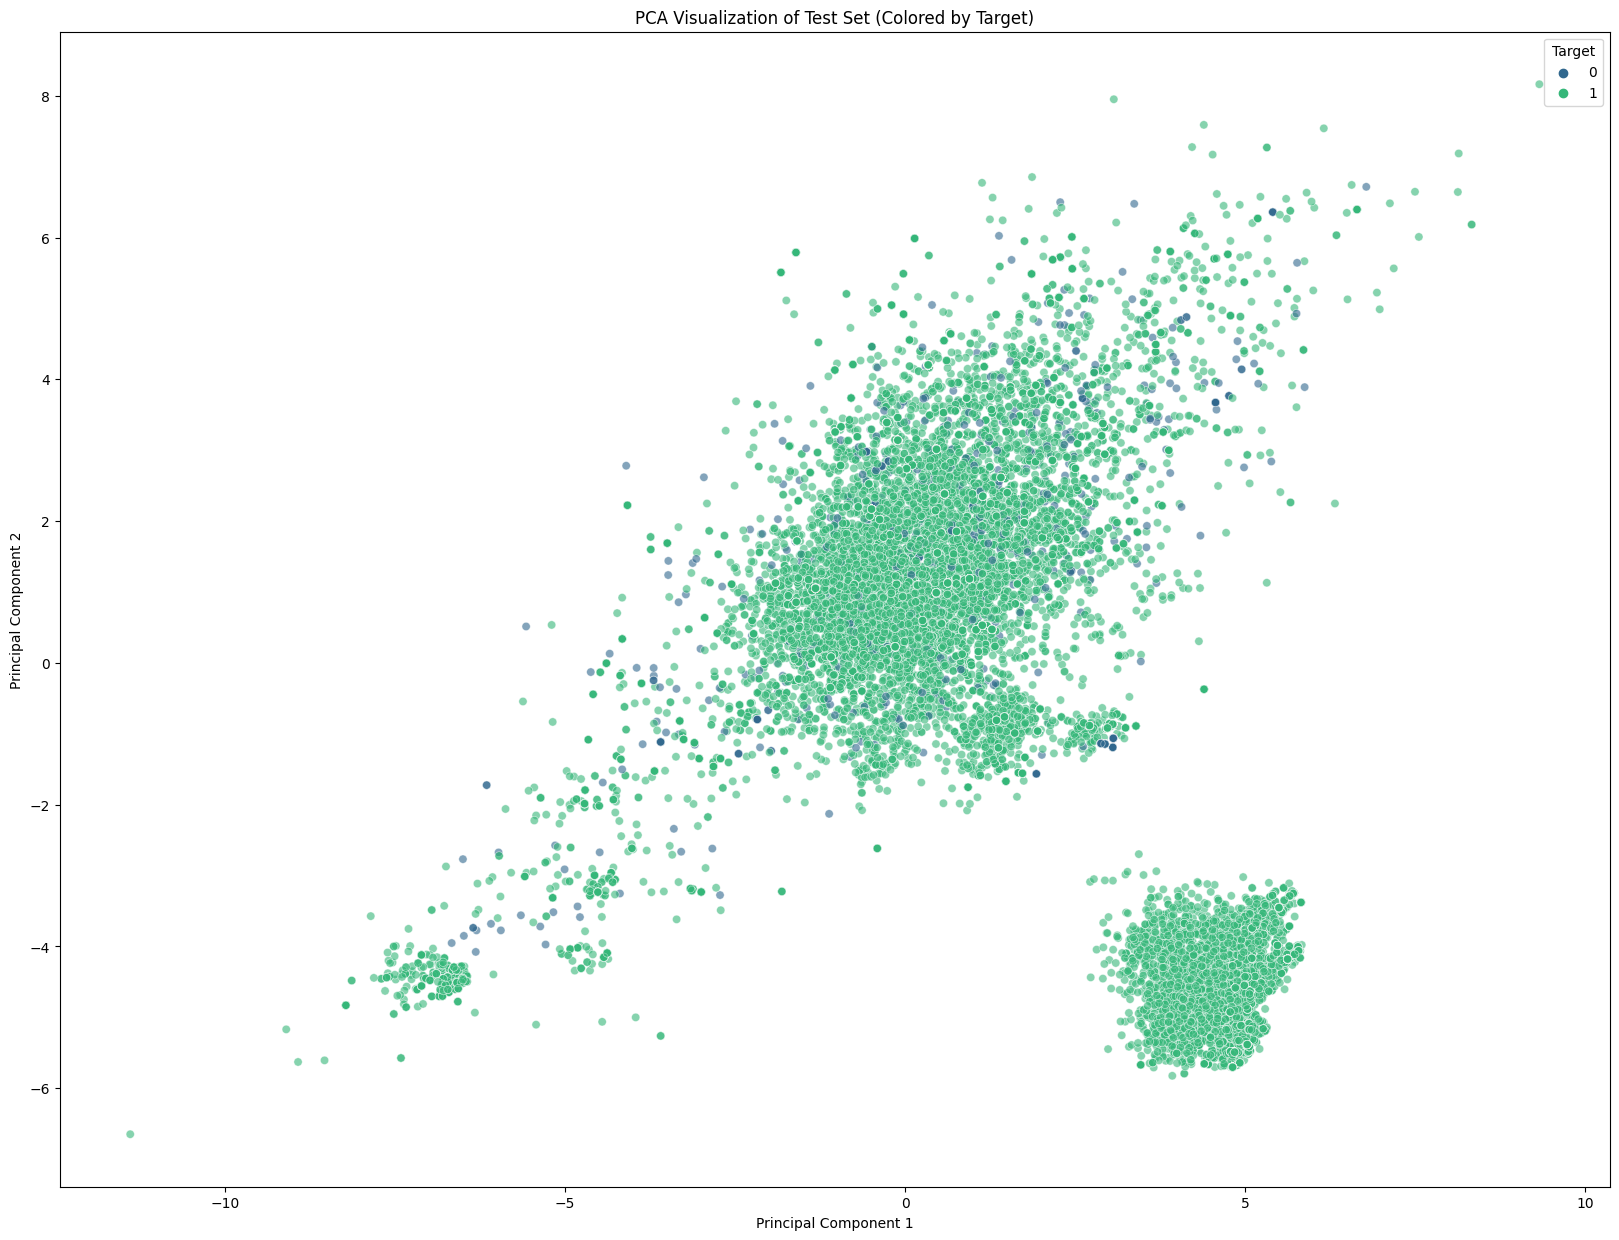

In [17]:
# --- Visualize the PCA-transformed data ---

# Create a DataFrame for the test set PCA components
plot_data = pd.DataFrame({
    'PC1': x_train[:, 0],  # First principal component
    'PC2': x_train[:, 1],  # Second principal component
    'Target': y_train         # Target variable for coloring
})

# Create the scatter plot
plt.figure(figsize=(20, 15))
sns.scatterplot(
    data=plot_data,
    x="PC1",
    y="PC2",
    hue="Target",  # Color by target variable (e.g., charges)
    palette="viridis",  # Continuous palette for charges
    alpha=0.6  # Slight transparency for overlapping points
)

# Set labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Test Set (Colored by Target)")

# Optionally add a regression line (if desired)
# sns.regplot(data=plot_data, x="PC1", y="PC2", scatter=False, color="blue")

# Show the plot
plt.show()

## Oversampling

In [18]:
smote = SMOTE(random_state=42)
print("Shape of original x_train:", x_train.shape)
print("Shape of original y_train:", y_train.shape)
x_train, y_train = smote.fit_resample(x_train, y_train)
# Print the shapes of the original and resampled data to see the effect
print("Shape of original x_train:", x_train.shape)
print("Shape of original y_train:", y_train.shape)
y_train.value_counts(normalize=True)*100

Shape of original x_train: (35100, 2)
Shape of original y_train: (35100,)
Shape of original x_train: (68494, 2)
Shape of original y_train: (68494,)


malware
1    50.0
0    50.0
Name: proportion, dtype: float64

## Visualization after oversampling

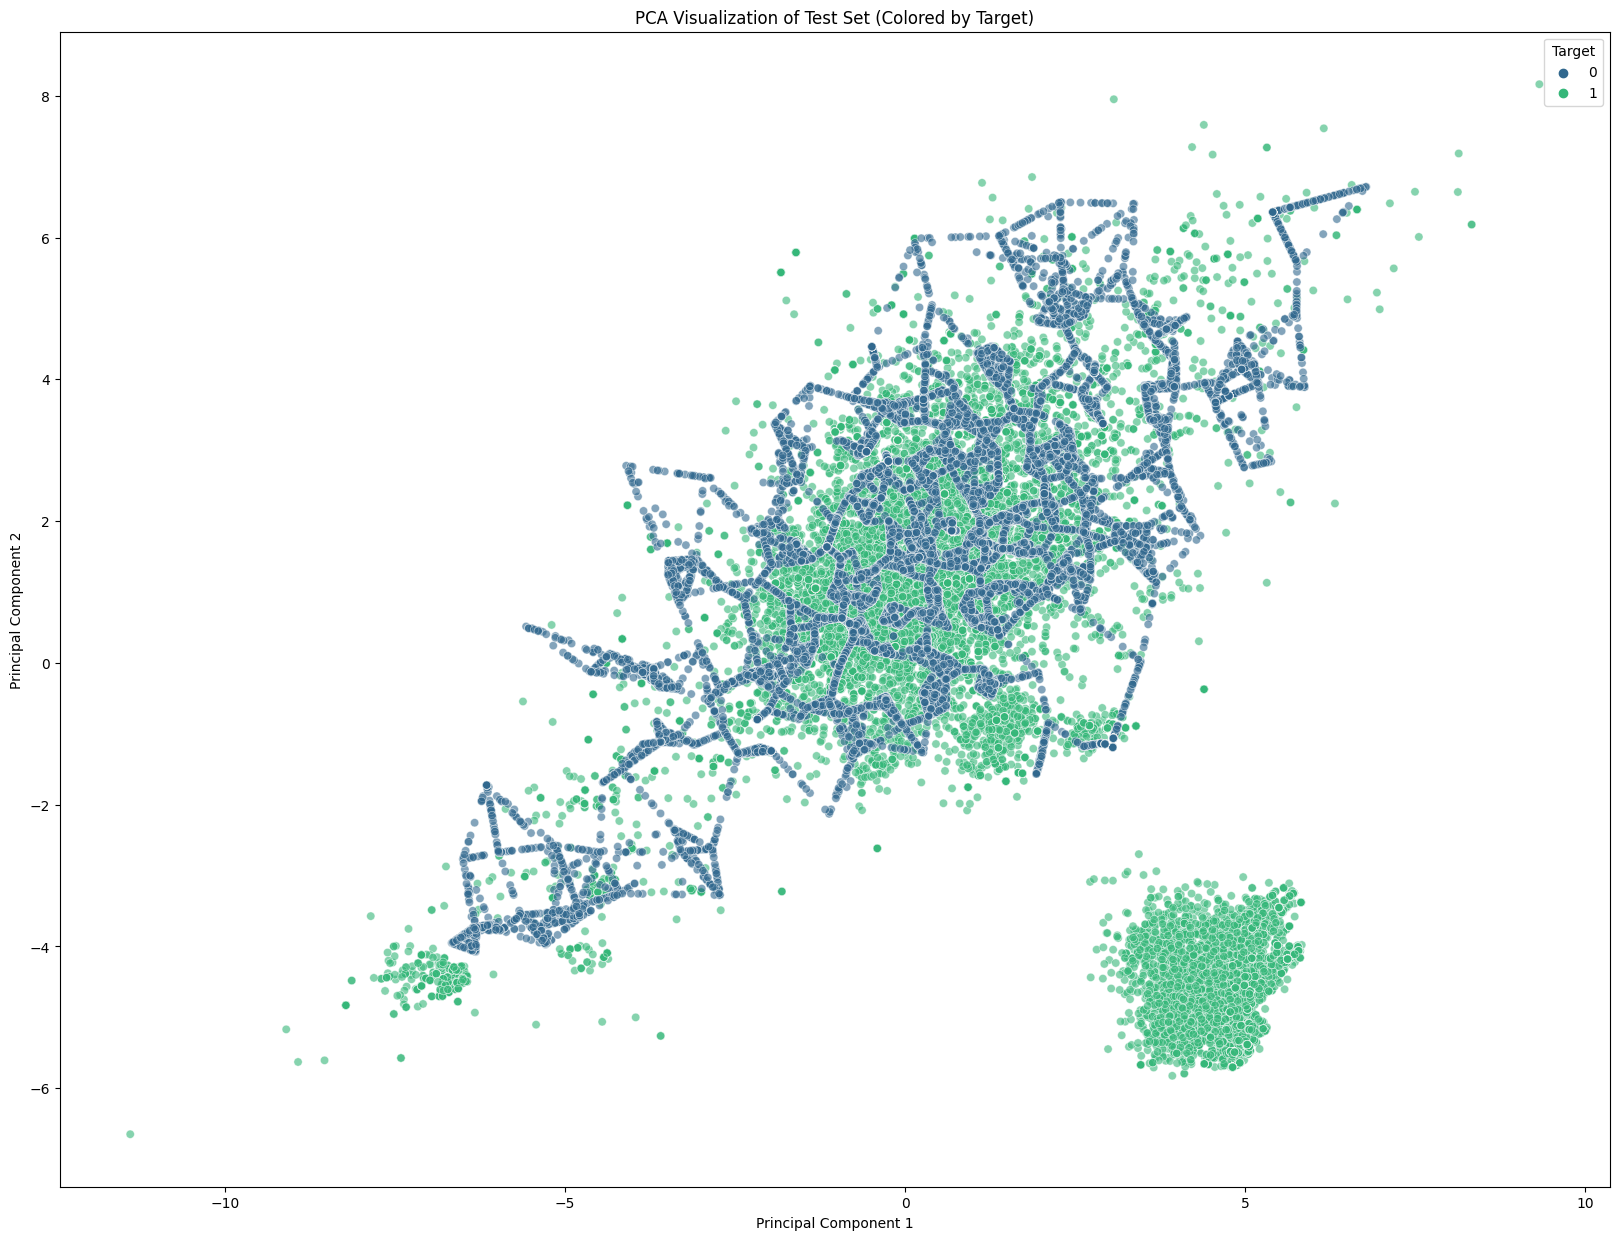

In [19]:
# --- Visualize the PCA-transformed data ---

# Create a DataFrame for the test set PCA components
plot_data = pd.DataFrame({
    'PC1': x_train[:, 0],  # First principal component
    'PC2': x_train[:, 1],  # Second principal component
    'Target': y_train         # Target variable for coloring
})

# Create the scatter plot
plt.figure(figsize=(20, 15))
sns.scatterplot(
    data=plot_data,
    x="PC1",
    y="PC2",
    hue="Target",  # Color by target variable (e.g., charges)
    palette="viridis",  # Continuous palette for charges
    alpha=0.6  # Slight transparency for overlapping points
)

# Set labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Test Set (Colored by Target)")

# Optionally add a regression line (if desired)
# sns.regplot(data=plot_data, x="PC1", y="PC2", scatter=False, color="blue")

# Show the plot
plt.show()

# Modeling and Experiments

## Model Architecture, model building (Torch), and model training

In [20]:
# Convert NumPy arrays to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

# Split data into training and validation sets (equivalent to Keras validation_split)
# test_size=0.2 means 20% of the data will be used for validation
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train_tensor, y_train_tensor, test_size=0.2, random_state=42
)

# Lists to store history for plotting (equivalent to Keras history object)
# Moved these initializations to the top to ensure they are defined before use.
train_loss_history = []
val_loss_history = []
train_accuracy_history = []
val_accuracy_history = []

# --- Define the Perceptron Model using PyTorch's nn.Module ---
class PerceptronModel(nn.Module):
    """
    A simple Perceptron model implemented using PyTorch's nn.Module.
    It consists of a single linear layer followed by a sigmoid activation
    function, making it suitable for binary classification tasks.
    """
    def __init__(self, input_dim):
        """
        Initializes the PerceptronModel.

        Args:
            input_dim (int): The number of input features for the model.
        """
        super(PerceptronModel, self).__init__()
        # Define the single linear layer.
        # input_dim: number of input features (x_train.shape[1])
        # 1: number of output features (one neuron for binary classification)
        self.linear = nn.Linear(input_dim, 1)
        # Define the sigmoid activation function. This squashes the output
        # of the linear layer to a range between 0 and 1, interpretable as probabilities.
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        """
        Defines the forward pass of the model. This method specifies how
        the input data 'x' is processed through the layers to produce an output.

        Args:
            x (torch.Tensor): The input tensor to the model.

        Returns:
            torch.Tensor: The output tensor after applying the linear transformation
                          and sigmoid activation.
        """
        # Apply the linear transformation to the input
        x = self.linear(x)
        # Apply the sigmoid activation function
        x = self.sigmoid(x)
        return x

# Instantiate the model
input_dim = x_train.shape[1] # Get the number of features from your training data
model = PerceptronModel(input_dim)

# Print a summary of the model architecture (manual equivalent to Keras model.summary())
print("\n--- Model Architecture ---")
print(model)
# Calculate and print the total number of trainable parameters in the model
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Number of trainable parameters: {total_params}")

# --- Define Loss Function and Optimizer ---
# For binary classification with a sigmoid output layer, BCELoss (Binary Cross-Entropy Loss)
# is the appropriate loss function.
# If the sigmoid activation was NOT part of the model's forward pass,
# nn.BCEWithLogitsLoss() would be used for numerical stability, as it combines
# sigmoid and BCE in one stable operation.
criterion = nn.BCELoss()

# Use the Adam optimizer, which is a popular choice for deep learning models.
# model.parameters() provides all trainable parameters of the model.
# lr (learning rate) controls the step size during optimization.
optimizer = optim.Adam(model.parameters(), lr=0.01)

# --- Implement Early Stopping ---
# This mechanism stops training if the validation loss does not improve for a
# specified number of epochs (patience) and restores the best performing weights.
early_stopping_patience = 8 # Number of epochs to wait for improvement
best_val_loss = float('inf') # Initialize with a very high value
patience_counter = 0 # Counter for consecutive epochs without improvement
best_model_state = None # To store the state_dict (weights) of the best model


# --- 4. Train the Model ---
epochs = 100 # Total number of training epochs
print("\n--- Training Model ---")
for epoch in range(epochs):
    # Set the model to training mode. This affects layers like Dropout and BatchNorm.
    model.train()
    
    # Zero the gradients. Gradients accumulate by default in PyTorch, so they must
    # be reset for each training iteration/batch.
    optimizer.zero_grad()

    # Forward pass: Pass the training data through the model to get predictions.
    outputs = model(x_train_split)
    # Calculate the loss between the model's predictions and the true labels.
    # Explicitly reshape y_train_split to match outputs shape (N, 1)
    loss = criterion(outputs, y_train_split.view_as(outputs))

    # Backward pass: Compute the gradients of the loss with respect to the model's parameters.
    loss.backward()
    # Optimizer step: Update the model's parameters using the computed gradients.
    optimizer.step()

    # --- Validation step ---
    # Set the model to evaluation mode. This disables layers like Dropout and
    # ensures BatchNorm uses global statistics.
    model.eval()
    # Disable gradient calculation for validation. This saves memory and speeds up
    # computation as gradients are not needed for evaluation.
    with torch.no_grad():
        # Get predictions on the validation set
        val_outputs = model(x_val_split)
        # Calculate validation loss
        # Explicitly reshape y_val_split to match val_outputs shape (N, 1)
        val_loss = criterion(val_outputs, y_val_split.view_as(val_outputs))

        # Calculate training accuracy for history plotting
        train_preds_for_acc = (outputs > 0.5).float()
        train_accuracy = (train_preds_for_acc == y_train_split).float().mean()

        # Calculate validation accuracy:
        # 1. Threshold the sigmoid outputs at 0.5 to get binary predictions (0 or 1).
        # 2. Compare predictions to true labels.
        # 3. Calculate the mean of correct predictions.
        val_preds = (val_outputs > 0.5).float()
        val_accuracy = (val_preds == y_val_split).float().mean()

    # Store metrics for plotting
    train_loss_history.append(loss.item())
    val_loss_history.append(val_loss.item())
    train_accuracy_history.append(train_accuracy.item())
    val_accuracy_history.append(val_accuracy.item())

    # Print training and validation progress for the current epoch
    print(f"Epoch {epoch+1}/{epochs}, "
          f"Train Loss: {loss.item():.4f}, "
          f"Train Accuracy: {train_accuracy.item():.4f}, " # Added train accuracy to print
          f"Validation Loss: {val_loss.item():.4f}, "
          f"Validation Accuracy: {val_accuracy.item():.4f}")

    # Early stopping logic:
    # If validation loss has improved, reset patience counter and save model state.
    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        patience_counter = 0
        best_model_state = model.state_dict() # Save the current best model weights
    # If validation loss has not improved, increment patience counter.
    else:
        patience_counter += 1
        # If patience limit is reached, stop training and restore best weights.
        if patience_counter >= early_stopping_patience:
            print(f"Early stopping triggered at epoch {epoch+1}. Restoring best weights.")
            model.load_state_dict(best_model_state) # Load the saved best weights
            break

print("\nTraining complete.")


--- Model Architecture ---
PerceptronModel(
  (linear): Linear(in_features=2, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of trainable parameters: 3

--- Training Model ---
Epoch 1/100, Train Loss: 0.8358, Train Accuracy: 0.4997, Validation Loss: 0.8303, Validation Accuracy: 0.5014
Epoch 2/100, Train Loss: 0.8285, Train Accuracy: 0.4997, Validation Loss: 0.8230, Validation Accuracy: 0.5013
Epoch 3/100, Train Loss: 0.8213, Train Accuracy: 0.4997, Validation Loss: 0.8159, Validation Accuracy: 0.5013
Epoch 4/100, Train Loss: 0.8143, Train Accuracy: 0.4997, Validation Loss: 0.8089, Validation Accuracy: 0.5013
Epoch 5/100, Train Loss: 0.8075, Train Accuracy: 0.4997, Validation Loss: 0.8022, Validation Accuracy: 0.5013
Epoch 6/100, Train Loss: 0.8008, Train Accuracy: 0.4997, Validation Loss: 0.7955, Validation Accuracy: 0.5013
Epoch 7/100, Train Loss: 0.7943, Train Accuracy: 0.4997, Validation Loss: 0.7891, Validation Accuracy: 0.5013
Epoch 8/100, Train Loss: 0.7880, Train Ac

## Visualize training loss and accuract during training

Final Training Loss (evaluated on full x_train): 0.6650
Final Training Accuracy (evaluated on full x_train): 0.5000

Learned Weights: [-0.1238685  -0.11044624]
Learned Bias: 0.1178

Sample Predictions (from training data):
  Input: [-8.22433293 -4.82968481], Actual: 1, Predicted (proba): 0.8416, Predicted (binary): 1
  Input: [-0.12432182  0.88072607], Actual: 1, Predicted (proba): 0.5090, Predicted (binary): 1
  Input: [-8.22433293 -4.82968481], Actual: 1, Predicted (proba): 0.8416, Predicted (binary): 1
  Input: [-0.15724425  0.2781775 ], Actual: 1, Predicted (proba): 0.5266, Predicted (binary): 1
  Input: [-1.31936251  1.05192543], Actual: 1, Predicted (proba): 0.5412, Predicted (binary): 1
  Input: [1.57739163 3.20050812], Actual: 1, Predicted (proba): 0.3939, Predicted (binary): 0
  Input: [0.78755629 3.21830904], Actual: 1, Predicted (proba): 0.4170, Predicted (binary): 0
  Input: [1.85246966 3.80433942], Actual: 1, Predicted (proba): 0.3701, Predicted (binary): 0
  Input: [0.055

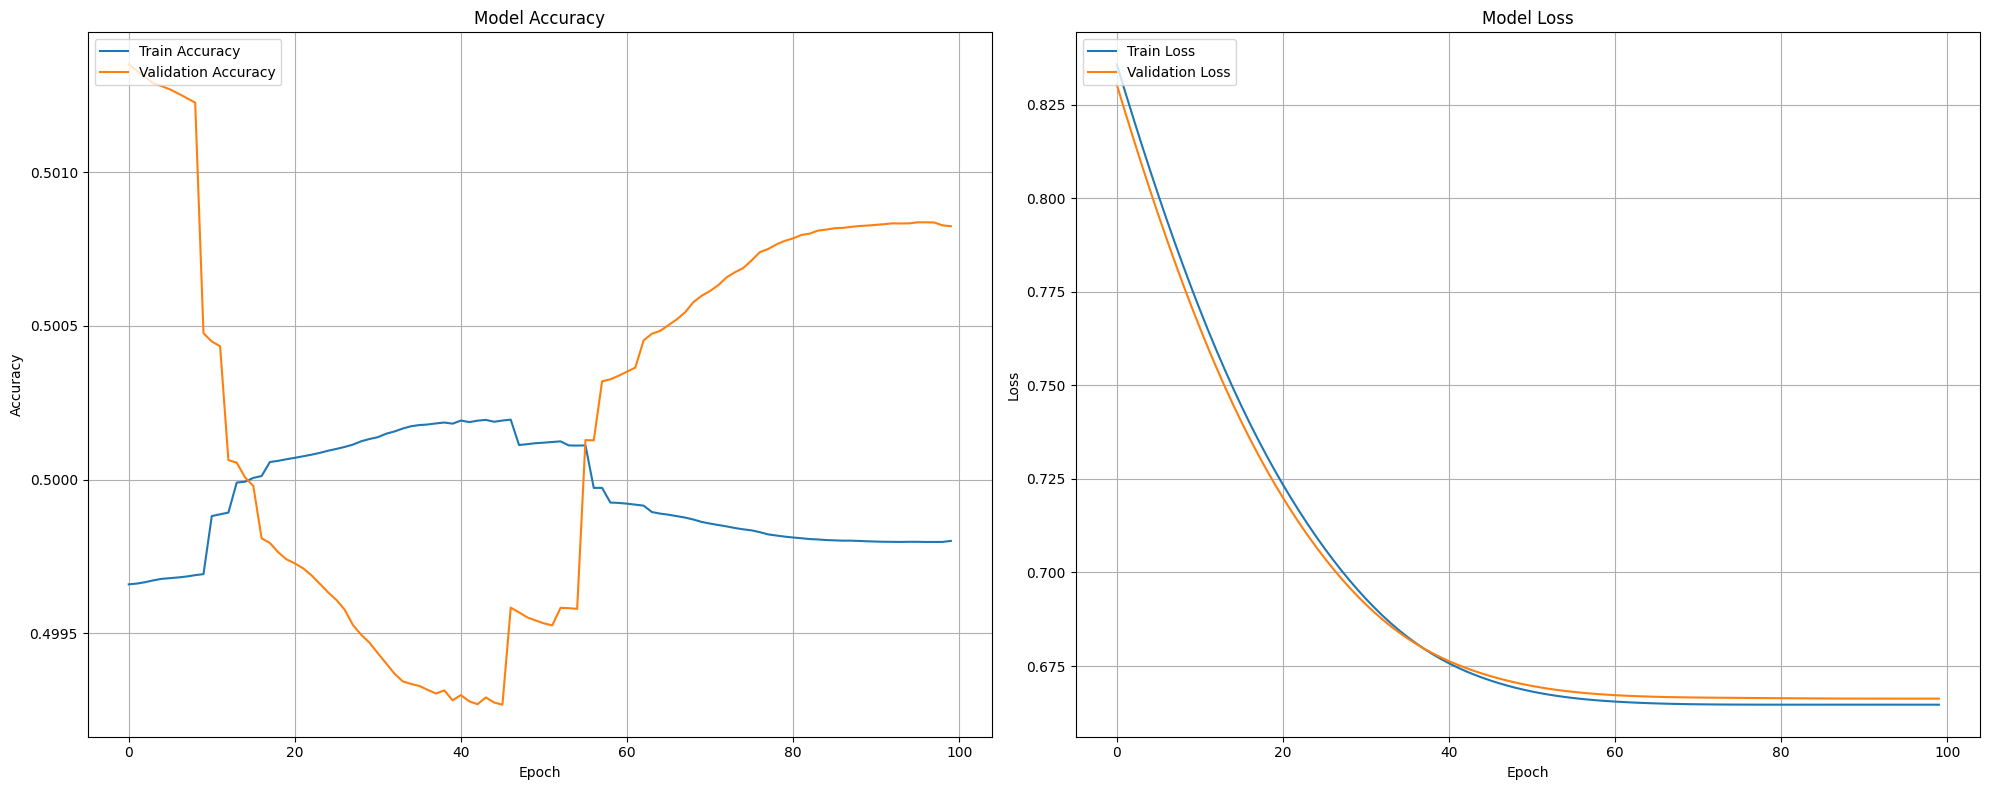

In [21]:
# Set the model back to evaluation mode
model.eval()
# Disable gradient calculations for final evaluation
with torch.no_grad():
    # Get predictions on the full training data
    outputs_train_eval = model(x_train_tensor)
    # Calculate the final training loss
    loss_train_eval = criterion(outputs_train_eval, y_train_tensor.view_as(outputs_train_eval))
    
    # Convert probabilities to binary predictions (0 or 1)
    predictions_train_eval = (outputs_train_eval > 0.5).float()
    
    # Calculate the final training accuracy
    accuracy_train_eval = (predictions_train_eval == y_train_tensor).float().mean()

print(f"Final Training Loss (evaluated on full x_train): {loss_train_eval.item():.4f}")
print(f"Final Training Accuracy (evaluated on full x_train): {accuracy_train_eval.item():.4f}")

# --- 6. Make Predictions ---
# Get the learned weights and bias
# For a single linear layer, weights are in model.linear.weight and bias in model.linear.bias
weights = model.linear.weight.data.cpu().numpy()
bias = model.linear.bias.data.cpu().numpy()
print(f"\nLearned Weights: {weights.flatten()}")
print(f"Learned Bias: {bias[0]:.4f}")

# Predict probabilities on the training data
# Use model.eval() and torch.no_grad() for prediction
model.eval()
with torch.no_grad():
    y_pred_proba_tensor = model(x_train_tensor)
y_pred_proba = y_pred_proba_tensor.cpu().numpy().flatten() # Convert to numpy and flatten
# Convert probabilities to binary predictions (0 or 1) using a threshold of 0.5
y_pred = (y_pred_proba > 0.5).astype(int)

print("\nSample Predictions (from training data):")
for i in range(min(10, len(x_train))): # Ensure we don't go out of bounds
    print(f"  Input: {x_train[i]}, Actual: {y_train[i]}, Predicted (proba): {y_pred_proba[i]:.4f}, Predicted (binary): {y_pred[i]}")

# --- 7. Visualize the Loss and Accuracy during Training ---
plt.figure(figsize=(20, 8))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(train_accuracy_history, label='Train Accuracy')
plt.plot(val_accuracy_history, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

## Visualize decision boundary on train dataset

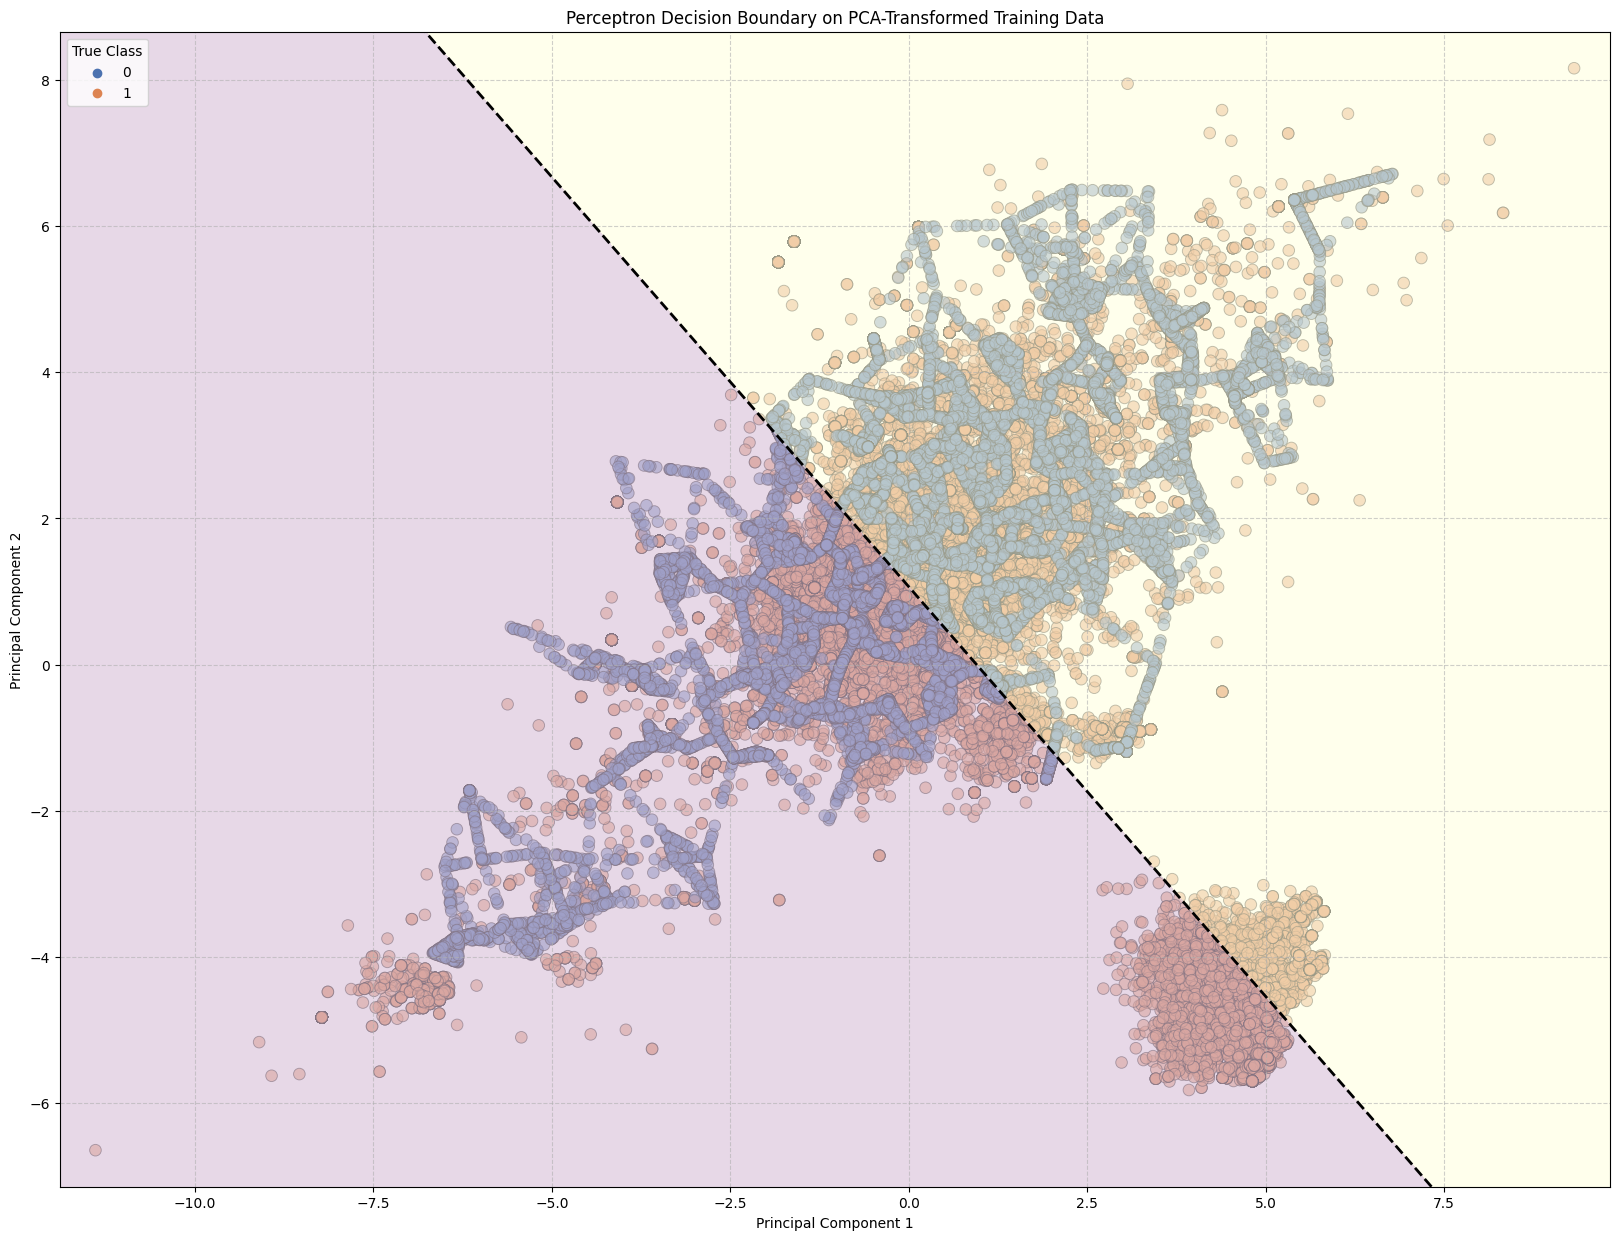

In [22]:
# --- Visualize the Decision Boundary of the Perceptron ---

# Create a DataFrame for the PCA-transformed training components for plotting
plot_data_train = pd.DataFrame({
    'PC1': x_train[:, 0],
    'PC2': x_train[:, 1],
    'Target': y_train
})

# Create the scatter plot with the specified figure size
plt.figure(figsize=(20, 15)) # Increased figure size as requested
sns.scatterplot(
    data=plot_data_train,
    x="PC1",
    y="PC2",
    hue="Target",
    palette="deep",
    alpha=0.6, # Alpha as requested
    edgecolor='k', # Add black edges to points for better visibility
    s=70 # Size of the points
)

# Create a meshgrid to plot the decision boundary
x_min, x_max = x_train[:, 0].min() - 0.5, x_train[:, 0].max() + 0.5
y_min, y_max = x_train[:, 1].min() - 0.5, x_train[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Prepare meshgrid for PyTorch model prediction
meshgrid_points = np.c_[xx.ravel(), yy.ravel()]
meshgrid_tensor = torch.tensor(meshgrid_points, dtype=torch.float32)

# Set model to evaluation mode and predict without gradients
model.eval()
with torch.no_grad():
    Z_proba_tensor = model(meshgrid_tensor)
# Convert predictions back to NumPy array and reshape
Z_proba = Z_proba_tensor.cpu().numpy().reshape(xx.shape)

# Plot the decision boundary as a filled contour
# To match the image, we will use specific colors for the contour regions
# and potentially adjust alpha. The image shows two distinct background colors
# for the decision regions.
# We will use Z_proba to define the regions directly.

# Define custom colormap for the two classes
# The image appears to use a light yellow for one class and a light purple/blue for the other.
colors_contourf = ['#FFFFE0', '#D8BFD8'] # Light Yellow and Thistle (light purple)
cmap_custom = plt.matplotlib.colors.ListedColormap(colors_contourf)


plt.contourf(xx, yy, Z_proba, levels=[0, 0.5, 1], alpha=0.6, cmap=cmap_custom) # Increased alpha for more solid fill
# Add a line for the decision boundary itself at 0.5 probability
plt.contour(xx, yy, Z_proba, levels=[0.5], colors='k', linestyles='--', linewidths=2)


# Set labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Perceptron Decision Boundary on PCA-Transformed Training Data")
plt.legend(title="True Class")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Model Evaluation

## Classification metrics and classification reports evaluation

In [23]:
# Make predictions on the scaled test data
# IMPORTANT: use x_test_pca for predictions as the model was trained on PCA-transformed data
# Convert x_test_pca to a PyTorch tensor
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)

model.eval() # Set model to evaluation mode
with torch.no_grad(): # Disable gradient calculations
    y_pred_proba_test_tensor = model(x_test_tensor)
y_pred_proba_test = y_pred_proba_test_tensor.cpu().numpy().flatten() # Convert to numpy and flatten
y_pred_test = (y_pred_proba_test > 0.5).astype(int) # Convert probabilities to binary predictions

# Convert y_test to numpy array if it's a pandas Series or tensor
y_test_np = y_test.cpu().numpy() if isinstance(y_test, torch.Tensor) else y_test.values if isinstance(y_test, pd.Series) else y_test


# Calculate metrics
cm = confusion_matrix(y_test_np, y_pred_test)
accuracy = accuracy_score(y_test_np, y_pred_test)
precision = precision_score(y_test_np, y_pred_test, average='macro', zero_division=1)
recall = recall_score(y_test_np, y_pred_test, average='macro', zero_division=1)
f1 = f1_score(y_test_np, y_pred_test, average='macro', zero_division=1)

# Calculate ROC-AUC for binary classification
roc_auc = roc_auc_score(y_test_np, y_pred_proba_test)

# Print the results
print(f"Confusion Matrix:\n{cm}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"AUC-ROC: {roc_auc:.3f}")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test_np, y_pred_test, zero_division=1))

Confusion Matrix:
[[ 171   55]
 [4134 4416]]
Accuracy: 0.523
Precision: 0.514
Recall: 0.637
F1-score: 0.377
AUC-ROC: 0.638

Classification Report:
              precision    recall  f1-score   support

           0       0.04      0.76      0.08       226
           1       0.99      0.52      0.68      8550

    accuracy                           0.52      8776
   macro avg       0.51      0.64      0.38      8776
weighted avg       0.96      0.52      0.66      8776



## Confusion metrics

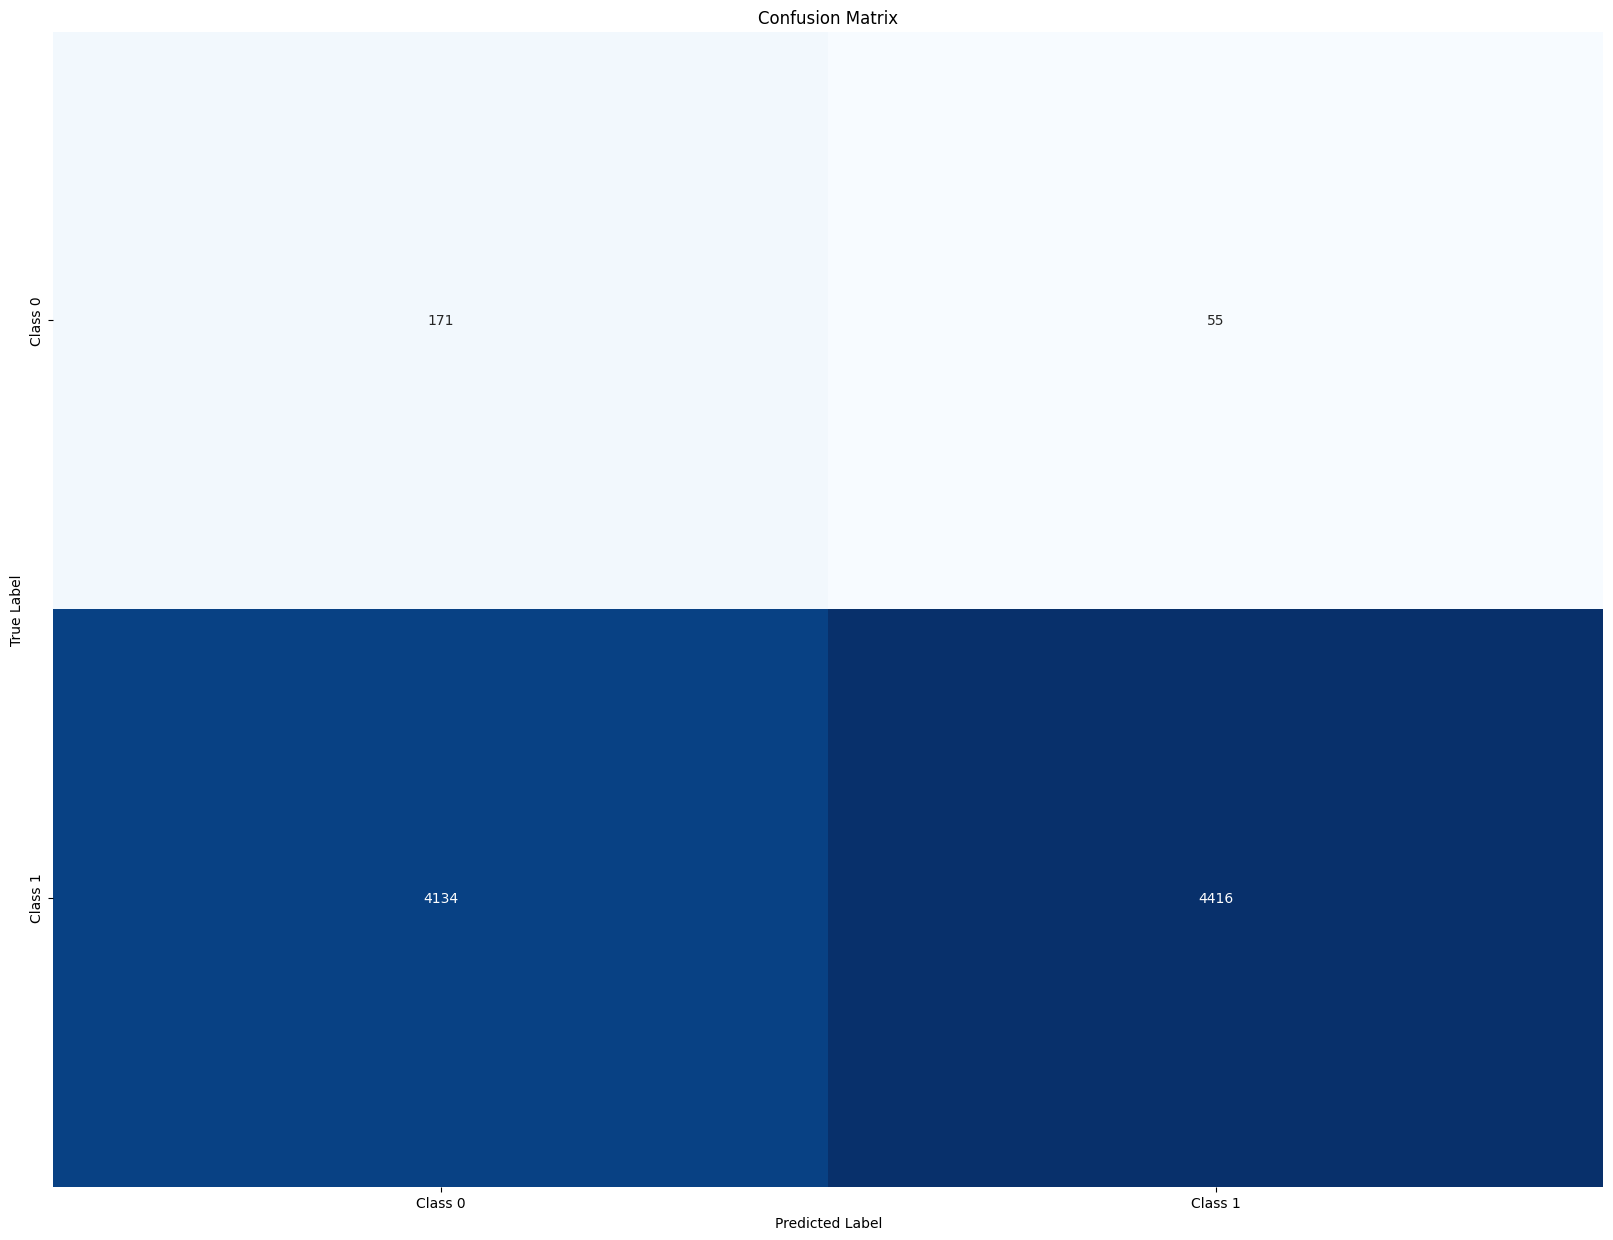

In [24]:
# --- Plotting Confusion Matrix ---
plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Precision Recall Curve


--- Plotting Precision-Recall Curve ---


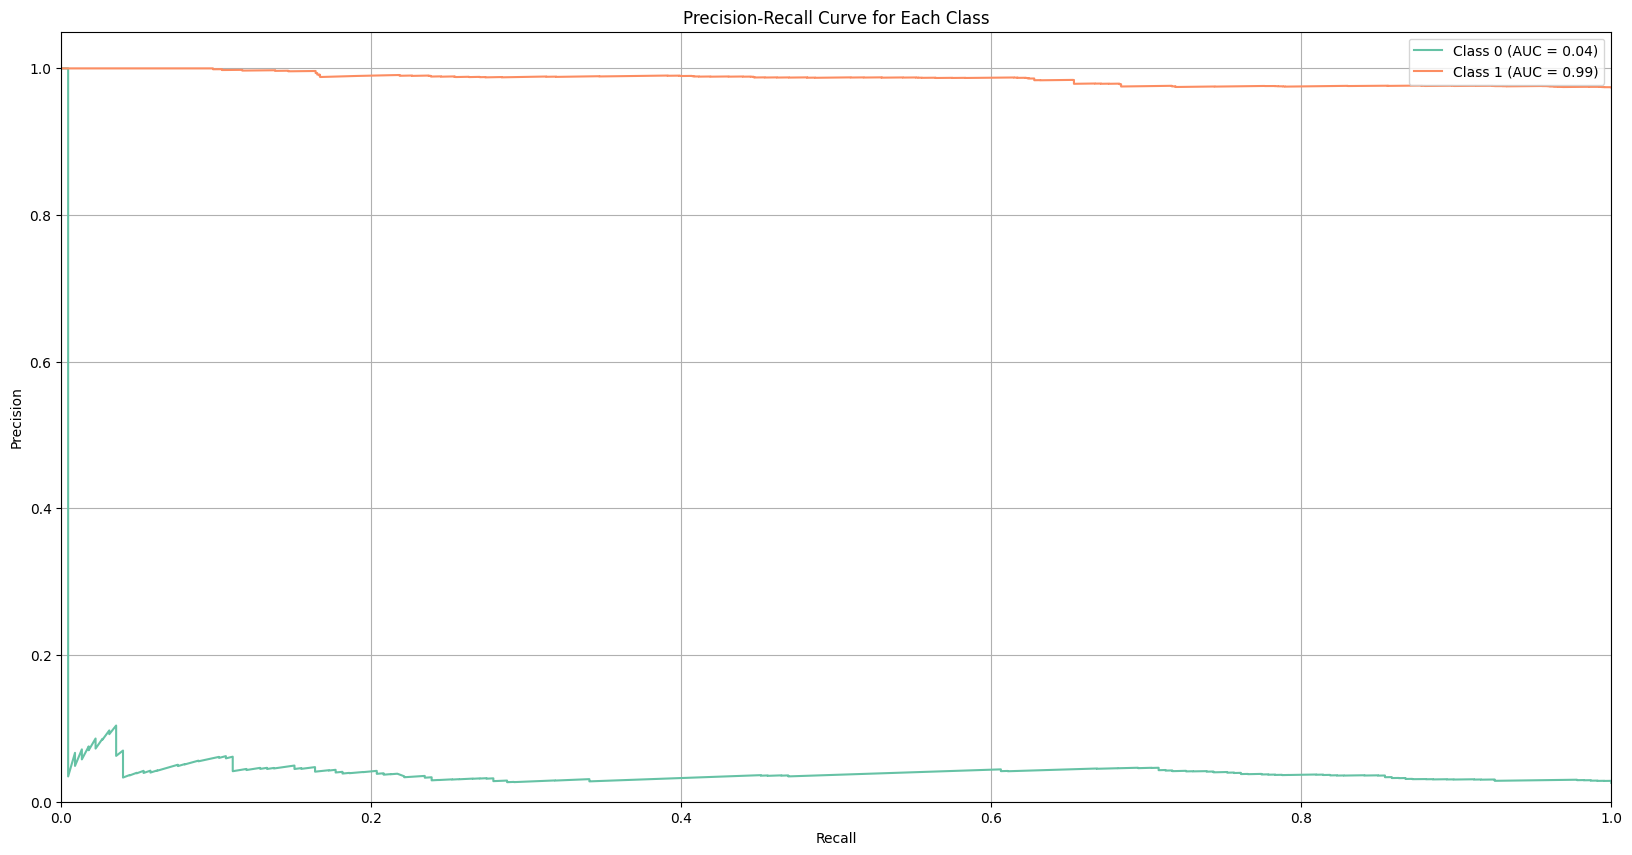

In [25]:
# --- Plotting Precision-Recall Curve ---
print("\n--- Plotting Precision-Recall Curve ---")

# Define class labels (for binary classification, 0 and 1)
class_labels = ["0", "1"]

# Initialize a plot
plt.figure(figsize=(20, 10))

# Set Seaborn color palette
sns.set_palette("Set2")

# Get the prediction probabilities for the test set
# Use the already computed y_pred_proba_test
y_pred_proba_test_pr = y_pred_proba_test # This is already computed above

# Generate Precision-Recall curve for each class
for i, label in enumerate(class_labels):
    # Get the true binary labels for the current class (OvR - One-vs-Rest)
    y_test_bin = np.where(y_test_np == int(label), 1, 0) # Use y_test_np

    # Determine the score for the current class
    # For a binary Perceptron with sigmoid:
    # If plotting for class 1 (positive class), use probabilities directly.
    # If plotting for class 0 (negative class), use (1 - probabilities).
    if int(label) == 1:
        y_pred_score = y_pred_proba_test_pr
    else: # For class 0, use 1 - probabilities to represent confidence for class 0
        y_pred_score = 1 - y_pred_proba_test_pr

    # Compute Precision-Recall values
    precision, recall, _ = precision_recall_curve(y_test_bin, y_pred_score)
    # Calculate AUC for the Precision-Recall curve
    pr_auc = auc(recall, precision)

    # Plot the curve
    plt.plot(recall, precision, label=f'Class {label} (AUC = {pr_auc:.2f})')

# Add plot details
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Each Class")
plt.legend(loc="upper right")
plt.ylim([0, 1.05])
plt.xlim([0, 1])
plt.grid(True) # Add a grid for better readability

# Show the plot
plt.show()

## ROC AUC Curve


--- Plot ROC Curve for Label 0 and 1 ---


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

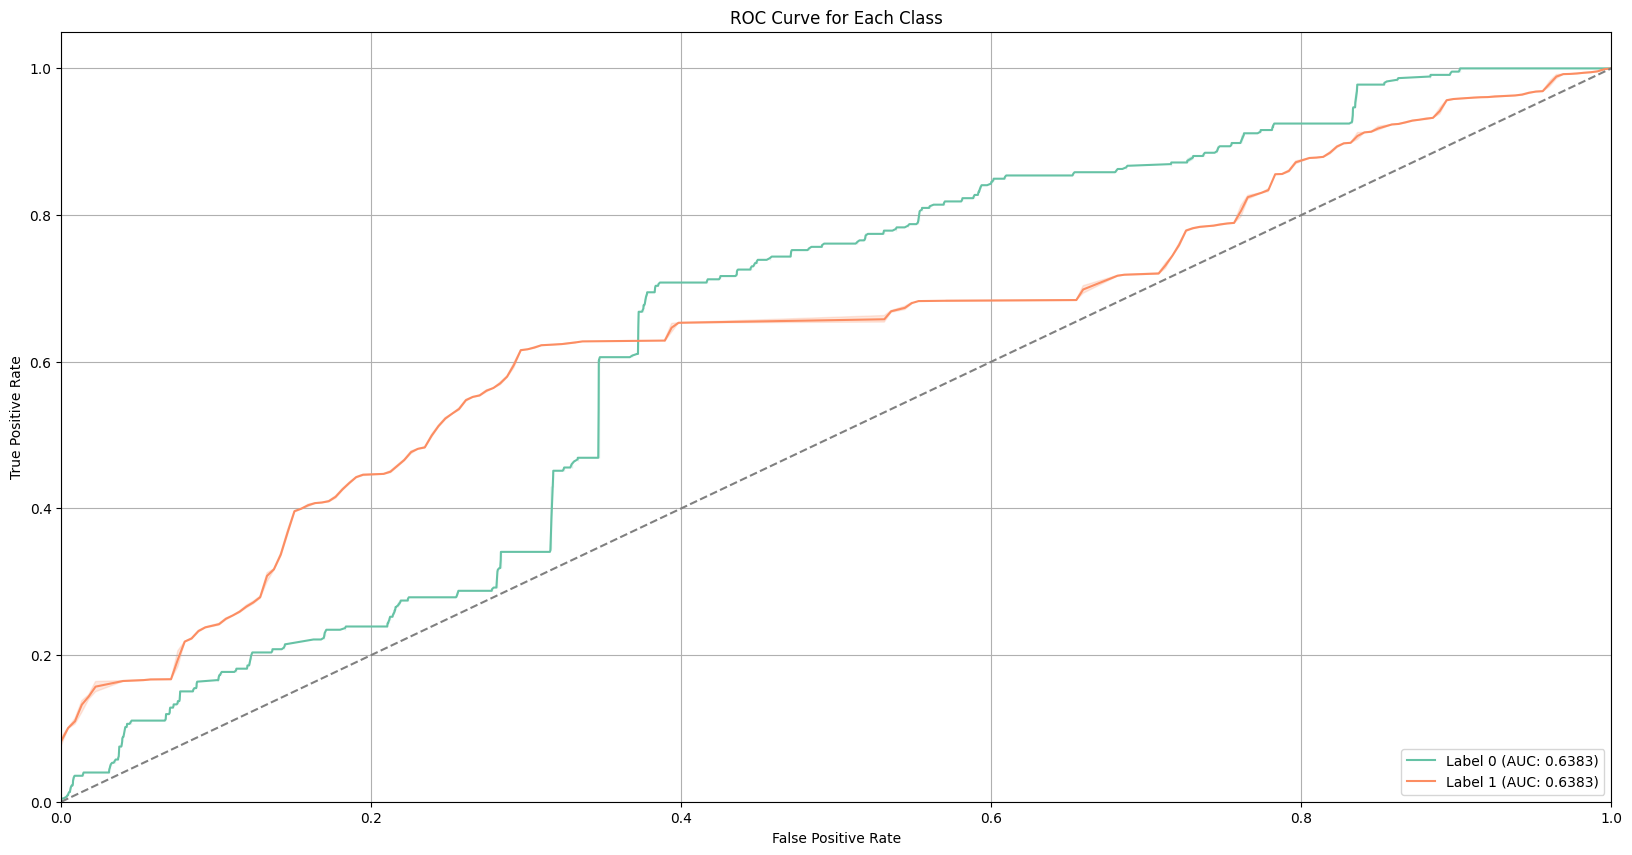


--- AUC ROC Values per Class ---
Label 0 AUC: 0.6383
Label 1 AUC: 0.6383
------------------------------


In [26]:
# --- Plot ROC Curve for Label 0 and 1 ---
print("\n--- Plot ROC Curve for Label 0 and 1 ---")

# Get prediction probabilities for the test set
# Convert x_test_pca to a PyTorch tensor
x_test_tensor_roc = torch.tensor(x_test, dtype=torch.float32) # Use x_test_pca

model.eval() # Set model to evaluation mode
with torch.no_grad(): # Disable gradient calculations
    y_pred_proba_roc_tensor = model(x_test_tensor_roc) # Use the correct tensor
y_pred_proba_roc = y_pred_proba_roc_tensor.cpu().numpy().flatten() # Convert to numpy and flatten


# Define class labels for plotting
class_labels_roc = ["Label 0", "Label 1"]
classes_roc = [0, 1]

# Initialize ROC curve and AUC dictionaries
fpr = dict()
tpr = dict()
roc_auc_per_class = dict() # Renamed to avoid conflict with roc_auc_val

# Create a new figure using Seaborn
plt.figure(figsize=(20, 10)) # Adjusted figure size for better readability

# Set Seaborn color palette
sns.set_palette("Set2")

# Loop over each class and calculate the ROC curve and AUC score
for i, class_val in enumerate(classes_roc):
    # For binary classification with PyTorch probabilities:
    # For label 1 (positive class), use y_test_np and y_pred_proba_roc directly.
    # For label 0 (negative class), invert y_test_np (1-y_test_np) and use (1 - y_pred_proba_roc).
    if class_val == 1: # For Label 1 (positive class)
        fpr[class_val], tpr[class_val], _ = roc_curve(y_test_np, y_pred_proba_roc)
    else: # For Label 0 (negative class)
        fpr[class_val], tpr[class_val], _ = roc_curve(1 - y_test_np, 1 - y_pred_proba_roc) # Invert true labels and probabilities

    # Calculate AUC
    roc_auc_per_class[class_val] = auc(fpr[class_val], tpr[class_val])

    # Plot ROC curve for each class
    sns.lineplot(x=fpr[class_val], y=tpr[class_val], label=f'{class_labels_roc[i]} (AUC: {roc_auc_per_class[class_val]:.4f})')

# Plot the random guessing line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc="lower right")
plt.grid(True) # Add grid for better readability
# plt.savefig('roc_curve_per_class.png') # Saving to file might not be visible in all environments

# Show the plot
plt.show()

# Show AUC values for each class
print("\n--- AUC ROC Values per Class ---")
for class_val in classes_roc:
    print(f"{class_labels_roc[class_val]} AUC: {roc_auc_per_class[class_val]:.4f}")
print("-" * 30)

## Visualize decision boundary

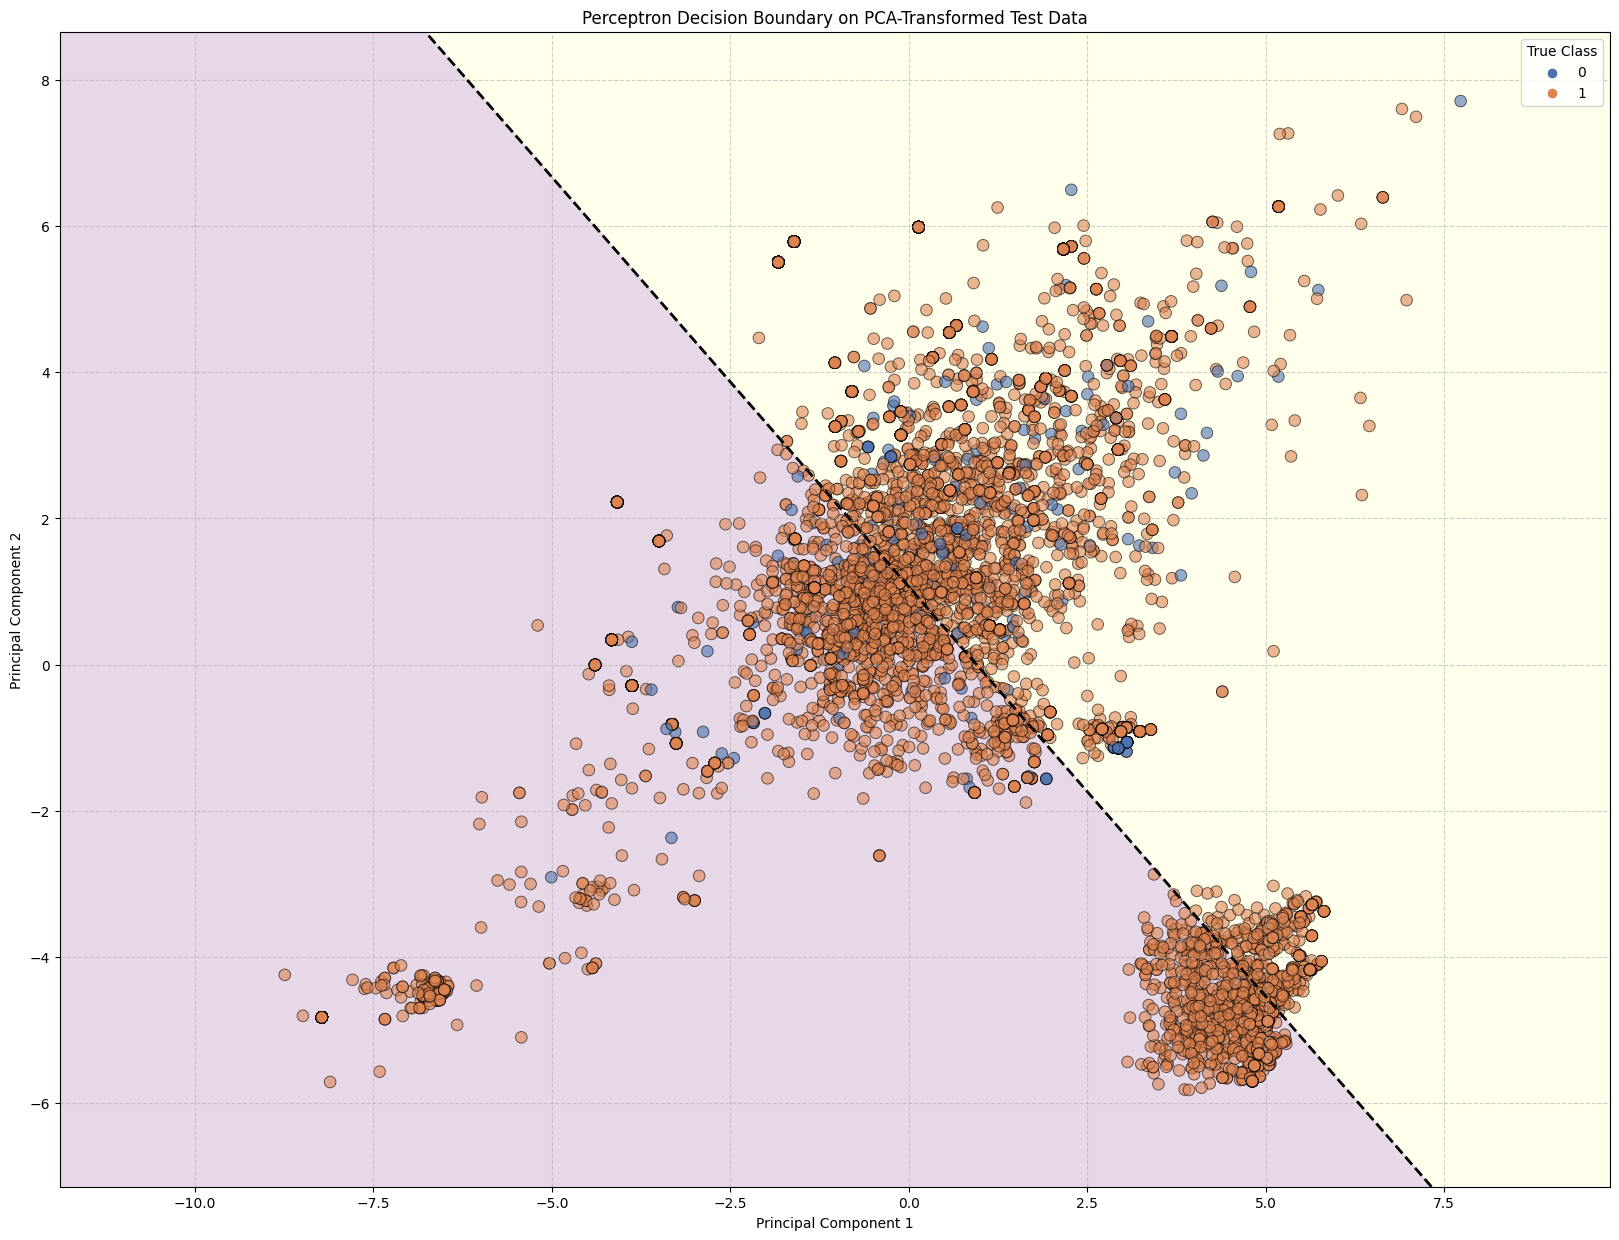

In [27]:
# --- Optional: Visualize test data on the same boundary ---
# plot the test data on the same decision boundary to see
# how well the model generalizes.
plot_data_test = pd.DataFrame({
    'PC1': x_test[:, 0], # Use x_test_pca
    'PC2': x_test[:, 1], # Use x_test_pca
    'Target': y_test_np # Use y_test_np
})

plt.figure(figsize=(20, 15)) # Consistent figure size

# Re-calculate Z_proba for the meshgrid (if not already in scope from previous cell)
# This ensures Z_proba is defined for this plotting section
meshgrid_points_test = np.c_[xx.ravel(), yy.ravel()]
meshgrid_tensor_test = torch.tensor(meshgrid_points_test, dtype=torch.float32)

model.eval()
with torch.no_grad():
    Z_proba_tensor_test = model(meshgrid_tensor_test)
Z_proba_test = Z_proba_tensor_test.cpu().numpy().reshape(xx.shape)

# Define custom colormap for the two classes (consistent with training data plot)
colors_contourf_test = ['#FFFFE0', '#D8BFD8'] # Light Yellow and Thistle (light purple)
cmap_custom_test = plt.matplotlib.colors.ListedColormap(colors_contourf_test)

# Plot the same decision regions using Z_proba_test
plt.contourf(xx, yy, Z_proba_test, levels=[0, 0.5, 1], alpha=0.6, cmap=cmap_custom_test)
# Add a line for the decision boundary itself at 0.5 probability
plt.contour(xx, yy, Z_proba_test, levels=[0.5], colors='k', linestyles='--', linewidths=2)


sns.scatterplot(
    data=plot_data_test,
    x="PC1",
    y="PC2",
    hue="Target",
    palette="deep",
    alpha=0.6, # Consistent alpha
    edgecolor='k',
    s=70
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Perceptron Decision Boundary on PCA-Transformed Test Data")
plt.legend(title="True Class")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()